## Overall Outline post EDA and Modelling

### What we have examined:

Plots:
* Bar charts of all categorical features.
* Bar charts of categorical features that are recategorized.
* Histograms of all numeric features 
* Histogram of Capital
* Boxplots of all numeric features
* Boxplot of Capital

* Pairsplot of all variables
* Correlation plot of all variables

Models:
* NN architecture trained on grouped and non grouped data sets

  * Corresponding loss - accuracy curves

* Forest architecture trained on grouped and non grouped data sets

  * Corresponding conf matrices


### What we should take into consideration:

* Examine corrplot, consider taking out of the non-grouped data set the features which have little/bad correlation with Income. How does this change model(s) accuracy? Discuss results in report.

* Consider supplementary curves alongside loss-accuracy curves?

* Consider confusion matrices of NN models?

Note: adult.test data is unnecessary as our validation data is technically 'unseen', we can use the validation data to effectively evaluate our model(s).



In [3]:
# Libraries we will use for our Exploratory Data Analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
def load_data(file):
  return pd.read_csv(file, header = None, names = ['age', 'workclass', 'fnlwgt',
                                                   'education', 'education-num',
                      'marital-status', 'occupation', 'relationship',
                      'race', 'sex', 'capital-gain', 'capital-loss',
                      'hours-per-week', 'native-country', 'income'])

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data
Saving adult.test to adult.test


## Non - Grouped Data Set EDA

In [4]:
eda = load_data('adult.data')
eda = eda.drop('education-num', axis=1)
eda

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
eda.dropna()
# Remove whitespace
for col in ['workclass', 'occupation', 'native-country']:
    eda[col] = eda[col].str.strip()
# Remove ? values
eda = (eda[(eda['workclass'] != '?')&
                   (eda['occupation'] != '?') &
                   (eda['native-country'] != '?')&
                   (eda['workclass'] != 'Without-pay')])

In [6]:
# number of unique values
eda.nunique()

age                  72
workclass             6
fnlwgt            20253
education            16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
income                2
dtype: int64

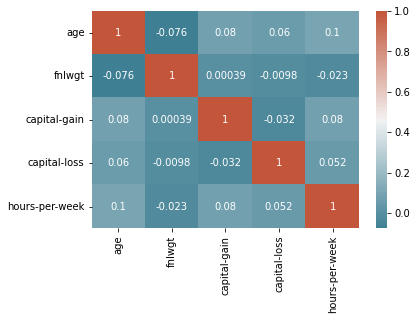

In [ ]:
# Plot correlation matrix
corr = eda.corr() # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

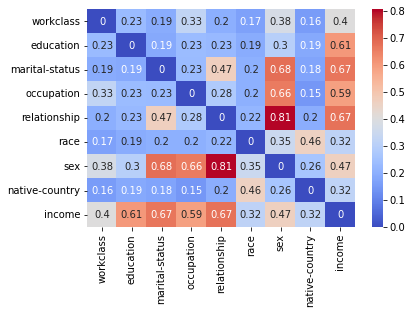

In [ ]:
# Inspect categorical variables heatmap
# from scipy.stats import cramers_v

# Select only the categorical columns
cat_cols = eda.select_dtypes(include=['object']).columns

# Compute the Cramer's V statistic for each pair of categorical variables
v_matrix = np.zeros((len(cat_cols), len(cat_cols)))
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if i == j:
            continue
        confusion_matrix = pd.crosstab(eda[col1], eda[col2])
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        phi = np.sqrt(chi2/n)
        k = min(confusion_matrix.shape[0], confusion_matrix.shape[1])
        v = np.sqrt(phi/(k-1))
        v_matrix[i, j] = v

# Create a heatmap to visualize the Cramer's V matrix
sns.heatmap(v_matrix, xticklabels=cat_cols, yticklabels=cat_cols, annot=True, cmap='coolwarm')
plt.show()

'fnlwgt' stands for 'Final Weight'. This should thus theoretically have the highest correlation with 'Income'.

Note: This statement is now incorrect, 'Final Weight' is a categorical column, so it does not technically have a correlation with anything.

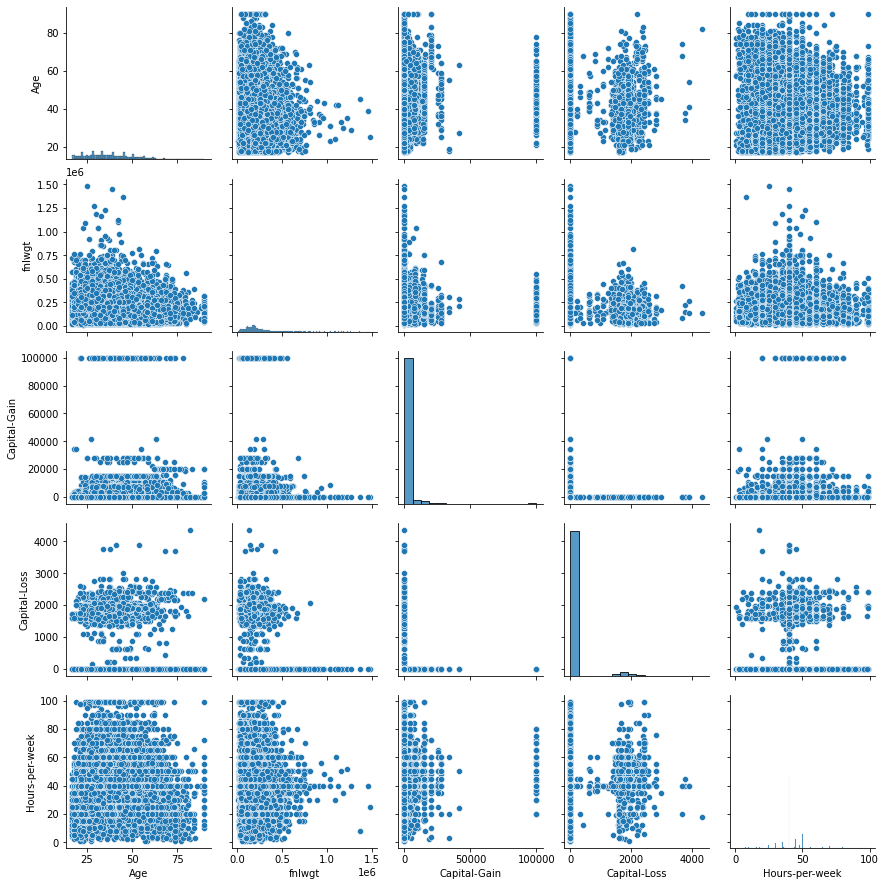

In [ ]:
# create scatterplots between all (numeric) variables
sns.pairplot(eda)

In [ ]:
eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,30148.0,38.433561,13.128876,17.0,28.0,37.0,47.00,90.0
fnlwgt,30148.0,189801.043983,105662.042233,13769.0,117618.0,178440.0,237647.25,1484705.0
Capital-Gain,30148.0,1092.288411,7408.005326,0.0,0.0,0.0,0.00,99999.0
Capital-Loss,30148.0,88.413527,404.387750,0.0,0.0,0.0,0.00,4356.0
Hours-per-week,30148.0,40.935054,11.976033,1.0,40.0,40.0,45.00,99.0


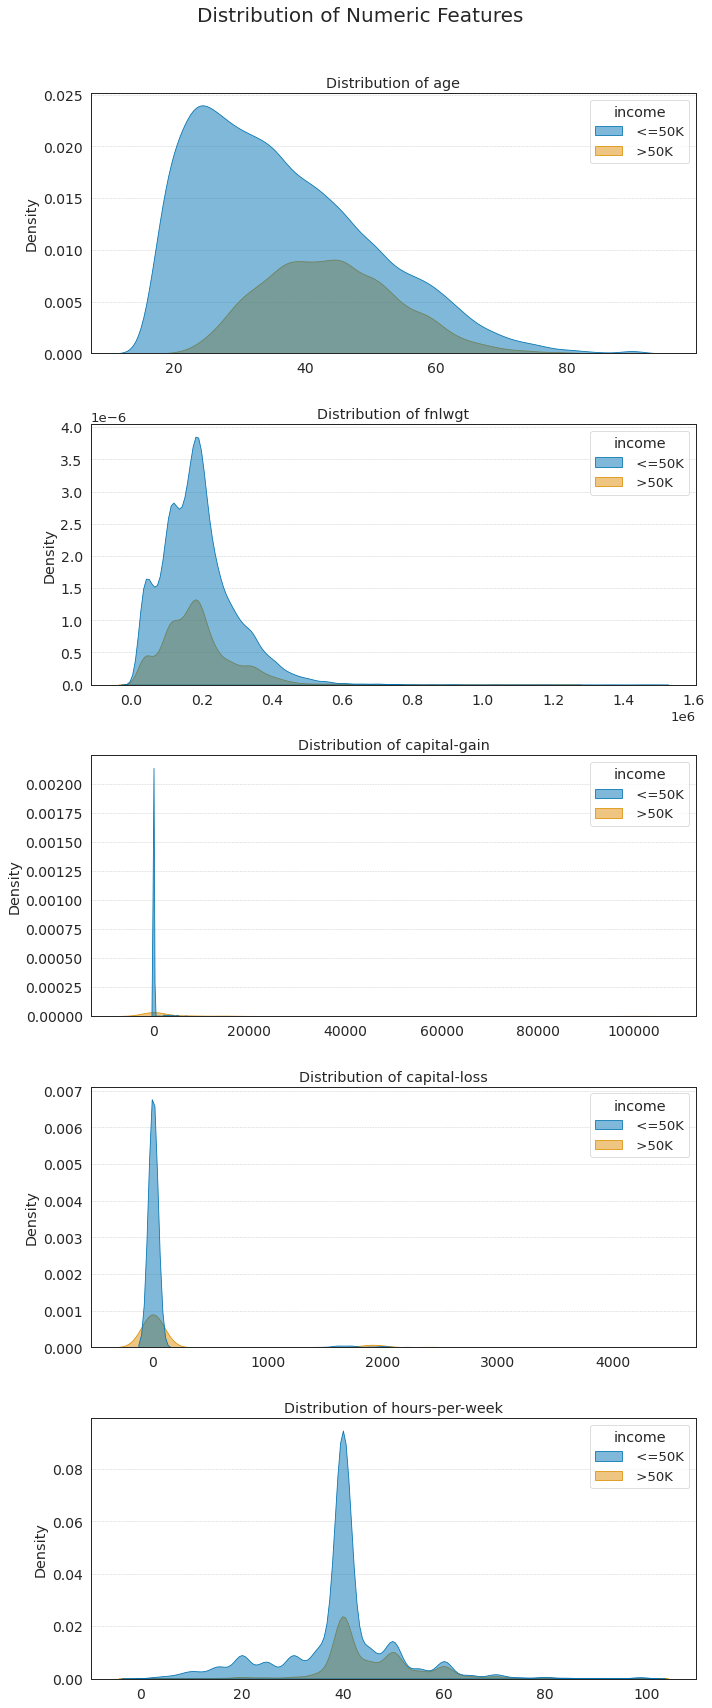

In [ ]:
# Define the numeric columns to plot
numeric_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a figure with subplots for each numeric column
fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 5*len(numeric_cols)))

# Customize the plot style
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

# Loop over each numeric column and plot a density plot with a filled-in area
for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=eda, x=col, fill=True, alpha=0.5, hue = 'income', ax=axs[i])
    axs[i].set_title(col.capitalize())
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Density")
    axs[i].tick_params(axis="both", which="major", labelsize=14)
    # axs[i].spines["top"].set_visible(False)
    # axs[i].spines["right"].set_visible(False)
    # axs[i].spines["bottom"].set_linewidth(0.5)
    # axs[i].spines["left"].set_linewidth(0.5)
    axs[i].yaxis.grid(linestyle='dashed', linewidth=0.5)
    axs[i].set_title('Distribution of ' + col)
    axs[i].xaxis.grid(False)

# Add a title and adjust the spacing between subplots
plt.suptitle("Distribution of Numeric Features", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a high-resolution image for use in a statistical article
# plt.savefig("numeric_feature_distributions.png", dpi=300)


In [ ]:
import pandas as pd

# def format_age(cell):
#     return '\033[1m\033[37m\033[44m\texttt{age}\033[0m'

data = {'Variable': ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
                     'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'fnlwgt'],
        'Description': ['Age of individual', 'Type of work done', 'Highest level of education completed', 'Number of years of education', 'Marital status of individual', 'Occupation of individual', 'Relationship of individual in household', 'Race of individual', 'Sex of individual', 'Capital gains earned', 'Capital losses incurred', 'Hours worked per week', 'Country of origin', 'Income level (>50K or <=50K)', 'Final weight of the data']}
        
df = pd.DataFrame(data)

# styled_df = df.style.apply(lambda x: ['font-weight: bold; font-family: monospace;' if i == 0 else '' for i in range(len(x))], axis=1, subset=pd.IndexSlice[:, ['Variable']])
# styled_df = styled_df.applymap(format_age, subset=pd.IndexSlice[:, ['Variable']])
# styled_df
df

,Variable,Description
0,age,Age of individual
1,workclass,Type of work done
2,education,Highest level of education completed
3,education-num,Number of years of education
4,marital-status,Marital status of individual
5,occupation,Occupation of individual
6,relationship,Relationship of individual in household
7,race,Race of individual
8,sex,Sex of individual
9,capital-gain,Capital gains earned


## Grouped Data Set EDA

In [7]:
# Helper function to group the adult data set
# We use these for alternative analyses
# Specific data extractor
def load_data(file):
  return pd.read_csv(file, header = None, names = ['age', 'workclass', 'fnlwgt',
                                                   'education', 'education-num',
                      'marital-status', 'occupation', 'relationship',
                      'race', 'sex', 'capital-gain', 'capital-loss',
                      'hours-per-week', 'native-country', 'income'])

# Encode Countries
def encode_country(country):
    if country == "United-States":
        return "USA"
    else:
        return "Non-USA"

# Categorize age
def categorize_age(age):
    if age <= 30:
        return '<=30'
    elif age <= 45:
        return '30-45'
    elif age <= 60:
        return '45-60'
    else:
        return '>60'

# Categorize workclass
def categorize_workclass(workclass):
    if workclass in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self-emp'
    elif '-gov' in workclass:
        return 'Gov'
    elif workclass == 'Private':
        return 'Private'
    else:
        return 'Other'

# Categorize marriage
def categorize_marriage(m):
    if m in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
      return 'Married'
    elif m == 'Divorced':
      return 'Divorced'
    elif m == 'Never-Married':
      return 'Never-Married'
    elif m == 'Separated':
      return 'Separated'
    elif m == 'Widowed':
      return 'Widowed'

# group education: before university, Undergraduate, Postgraduate, Associate
# HS-grad, some-college, 
def EduClear(x):
  if x in ['Preschool', '1st-4th', '5th-6th', '9th', '10th','11th', '12th', '7th-8th']:
    return 'Before-University'
  elif x in ['Assoc-voc', 'Assoc-acdm']:
    return 'Associate'
  elif x in ['Masters', 'Prof-school', 'Doctorate']:
    return 'Postgraduate'
  elif x == 'Bachelors':
    return 'Undergraduate'
  elif x == 'HS-grad':
    return 'HS-grad'
  elif x == 'Some-college':
    return 'Some-college'


In [8]:
edagroup = load_data('adult.data')
edagroup = edagroup.drop('education-num', axis=1)

In [9]:
# Remove all whitespaces and ? mark values
edagroup.dropna()
# Remove whitespace
for col in ['workclass', 'occupation', 'native-country', 'marital-status',
            'education']:
    edagroup[col] = edagroup[col].str.strip()

# Remove ? values
edagroup = (edagroup[(edagroup['workclass'] != '?')&
                   (edagroup['occupation'] != '?') &
                   (edagroup['native-country'] != '?')&
                   (edagroup['workclass'] != 'Without-pay')])

In [10]:
# recategorize workclass
edagroup['workclass'] = edagroup['workclass'].apply(categorize_workclass)
edagroup['workclass'].value_counts()

Private     22286
Gov          4289
Self-emp     3573
Name: workclass, dtype: int64

In [11]:
# recategorize marriage status
edagroup['marital-status'] = edagroup['marital-status'].apply(categorize_marriage)
edagroup['marital-status'].value_counts()

Married      14447
Divorced      4214
Separated      939
Widowed        826
Name: marital-status, dtype: int64

In [12]:
# recategorize education
edagroup['education'] = edagroup['education'].apply(EduClear)
edagroup['education'].value_counts()

HS-grad              9831
Some-college         6675
Undergraduate        5044
Before-University    3740
Postgraduate         2544
Associate            2314
Name: education, dtype: int64

In [13]:
# recategorize native country
edagroup['native-country'] = edagroup['native-country'].apply(encode_country)
edagroup['native-country'].value_counts()

USA        27491
Non-USA     2657
Name: native-country, dtype: int64

In [14]:
# recategorize capital gain and loss
edagroup['capital'] = edagroup['capital-gain'] - edagroup['capital-loss']

In [15]:
edagroup = edagroup.drop('capital-gain', axis=1)
edagroup = edagroup.drop('capital-loss', axis=1)
edagroup.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital
0,39,Gov,77516,Undergraduate,None,Adm-clerical,Not-in-family,White,Male,40,USA,<=50K,2174
1,50,Self-emp,83311,Undergraduate,Married,Exec-managerial,Husband,White,Male,13,USA,<=50K,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,<=50K,0
3,53,Private,234721,Before-University,Married,Handlers-cleaners,Husband,Black,Male,40,USA,<=50K,0
4,28,Private,338409,Undergraduate,Married,Prof-specialty,Wife,Black,Female,40,Non-USA,<=50K,0


Since we are only grouping the categorical variables corresponding to the columns:

* Marital-Status
* Education
* Workclass
* Native-Country

EDA on the numeric data will display the same results for both the grouped and non-grouped data sets.

The exception is Capital. Where we have set Capital = Capital-Gain minus Capital-Loss. 

Below, we will display Capital alongside histograms/barcharts displaying the value counts of the categorical variables before and after grouping.

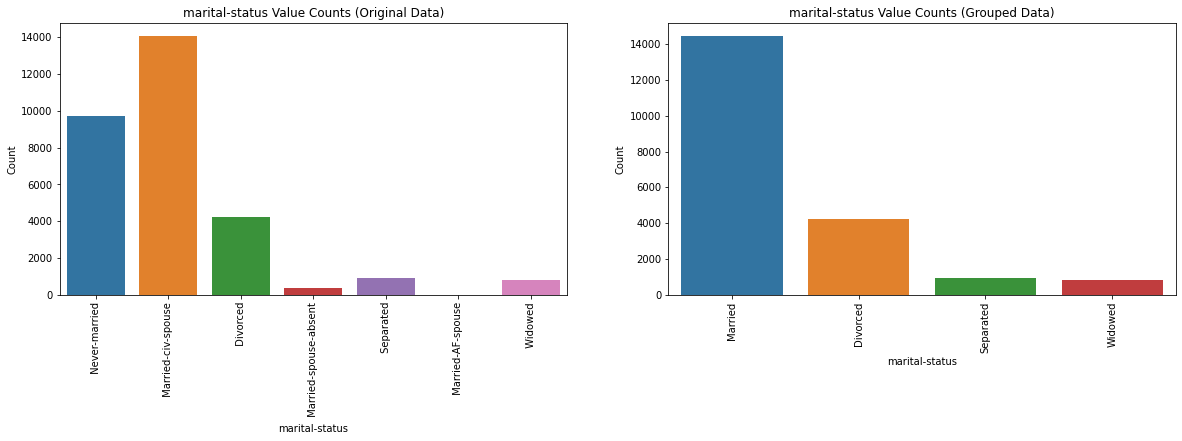

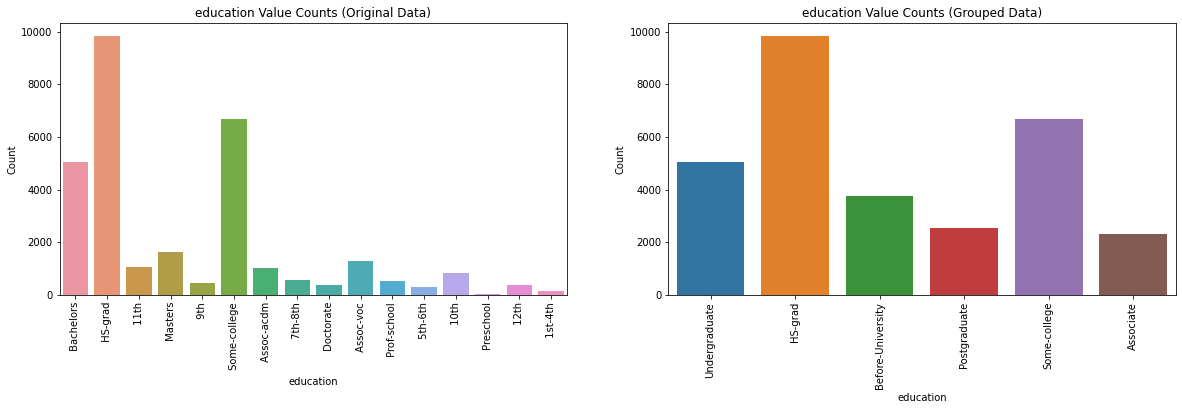

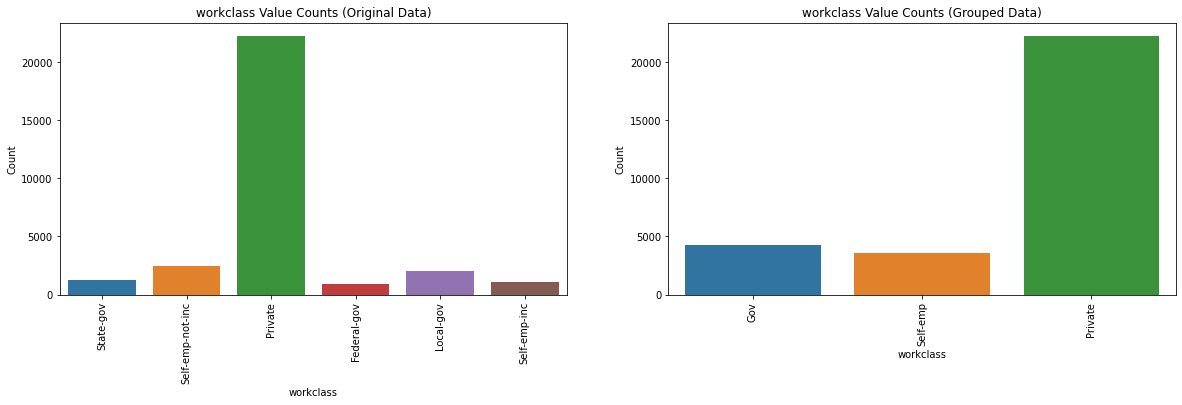

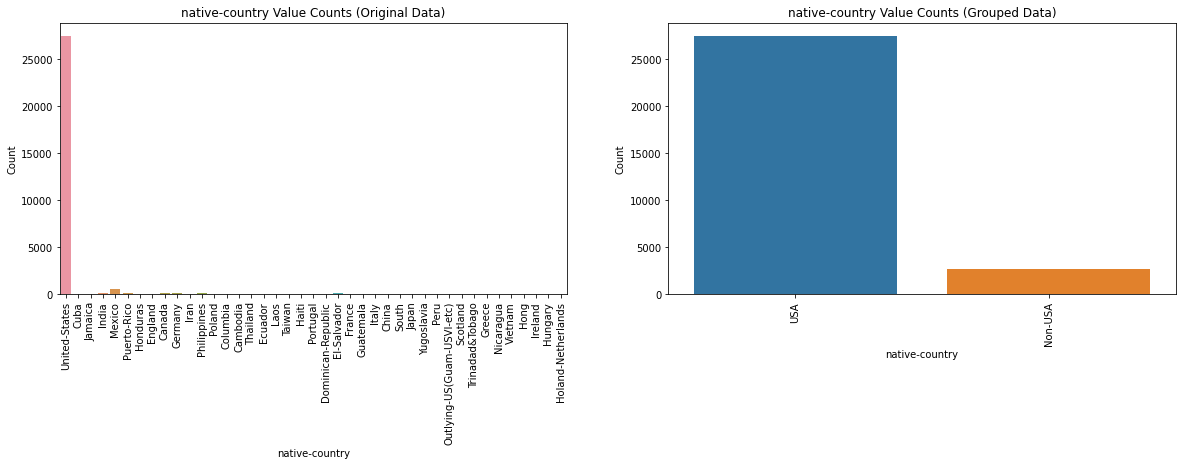

In [16]:
# Define the columns to plot
Recall = ['marital-status', 'education', 'workclass', 'native-country']

# Loop through the columns and plot the value counts
for column in Recall:
    # Get the value counts of the column in the original data
    counts1 = eda[column].value_counts()

    # Get the value counts of the column in the grouped data
    counts2 = edagroup[column].value_counts()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # Plot the value counts of the original data on the first subplot
    sns.countplot(x=eda[column], ax=ax1)
    ax1.set_title(f'{column} Value Counts (Original Data)')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=90)

    # Plot the value counts of the grouped data on the second subplot
    sns.countplot(x=edagroup[column], ax=ax2)
    ax2.set_title(f'{column} Value Counts (Grouped Data)')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=90)

    # Show the plot
    plt.show()

In [19]:
edagroup.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income', 'capital'],
      dtype='object')

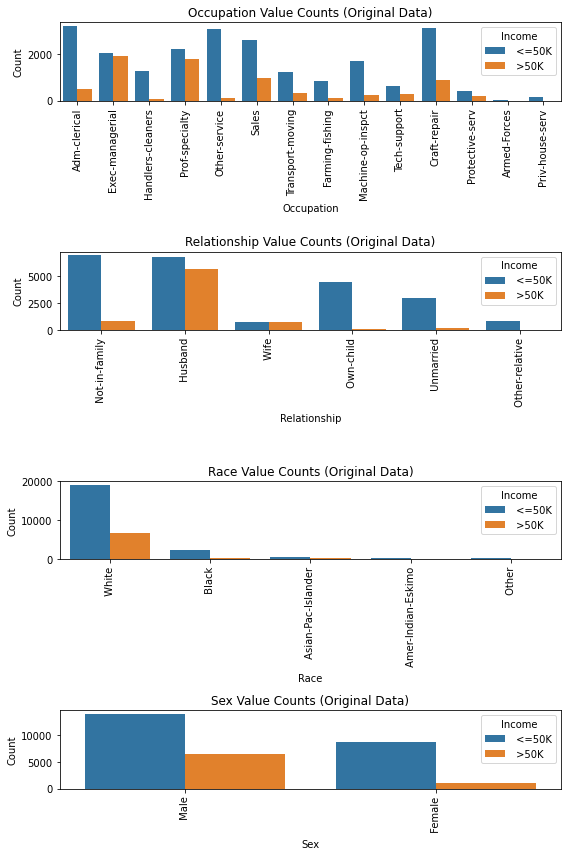

In [ ]:

Absent = ['Occupation', 'Relationship', 'Race', 'Sex']

# Create a new figure with 4 subplots, 4 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(8, 12))

# Loop through the columns and plot the value counts on separate subplots
for i, column in enumerate(Absent):
    # Get the value counts of the column in the original data
    value_counts = eda[column].value_counts()

    # Plot the value counts of the original data on the current subplot
    ax = axes[i]
    sns.countplot(x=column, hue = 'Income', data=eda, ax=ax)
    ax.set_title(f'{column} Value Counts (Original Data)')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()


* Race value count is primarily white, however this is not enough to warrant grouping, as there are still significant and distinct value counts of other races.

* Sex cannot be recategorized since there are only two sexes within the data set.

* Relationship has a semi-even spread of skews, this cannot be reasonably recategorized either.

* Occupation has a similar spread. Furthermore, occupation categories are very distinct (rephrase this), it would be difficult/reaching to recategorize these occupations into a smaller set of groups.

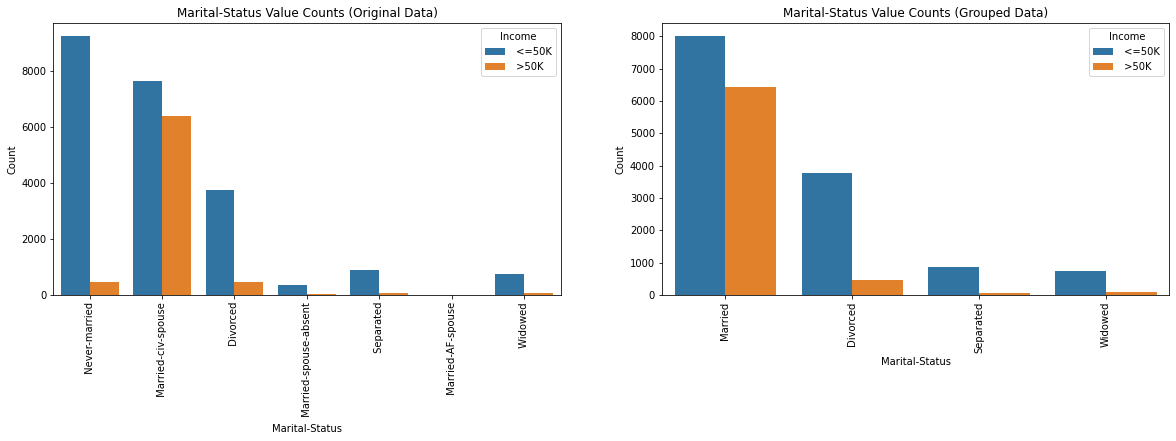

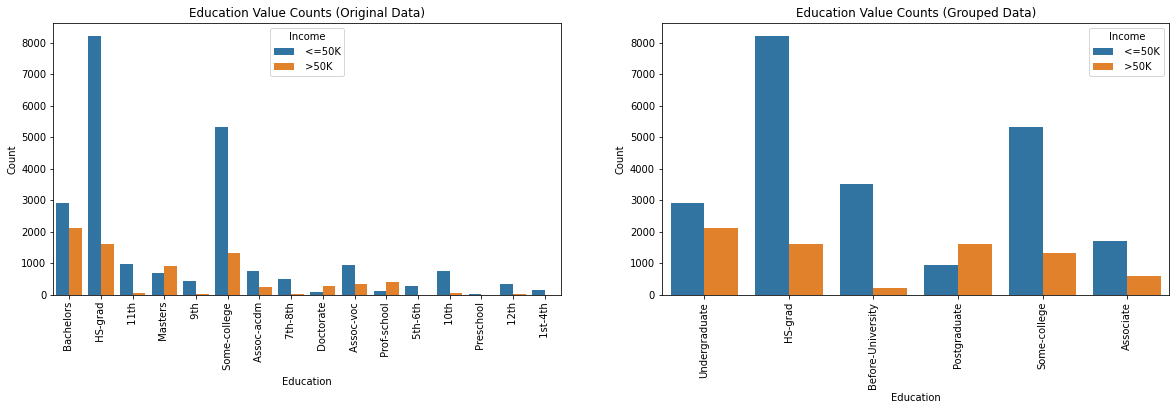

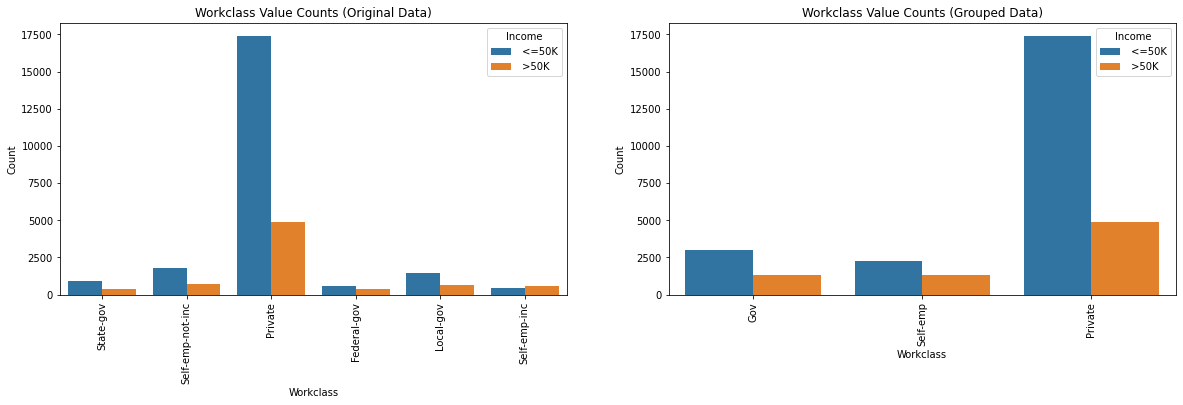

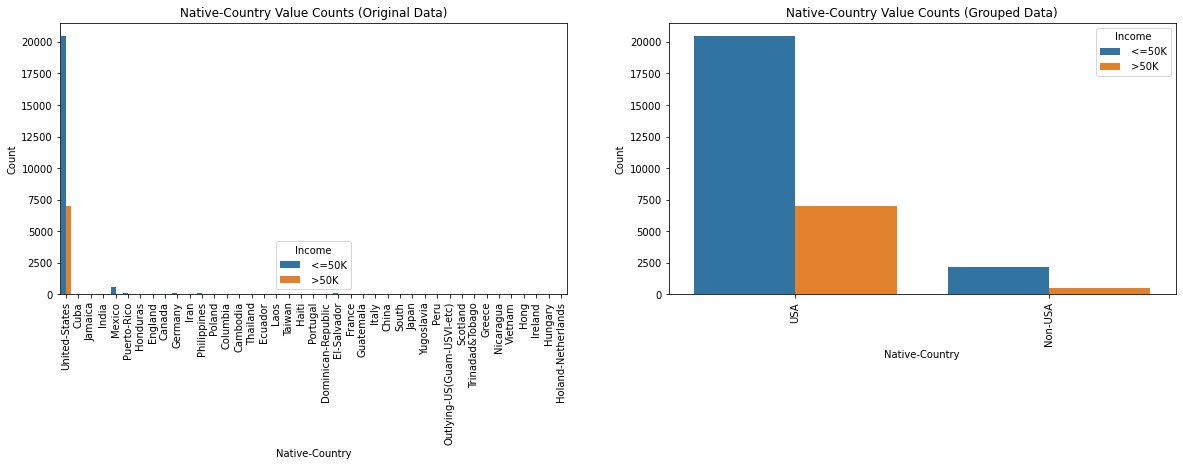

In [ ]:

# Define the columns to plot
Recall = ['Marital-Status', 'Education', 'Workclass', 'Native-Country']

# Loop through the columns and plot the value counts
for column in Recall:
    # Get the value counts of the column in the original data
    counts1 = eda[column].value_counts()

    # Get the value counts of the column in the grouped data
    counts2 = edagroup[column].value_counts()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # Plot the value counts of the original data on the first subplot
    sns.countplot(x = column, hue = 'Income', data = eda, ax=ax1)
    ax1.set_title(f'{column} Value Counts (Original Data)')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=90)

    # Plot the value counts of the grouped data on the second subplot
    sns.countplot(x=column,hue = 'Income', data = edagroup, ax=ax2)
    ax2.set_title(f'{column} Value Counts (Grouped Data)')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=90)

    # Show the plot
    plt.show()


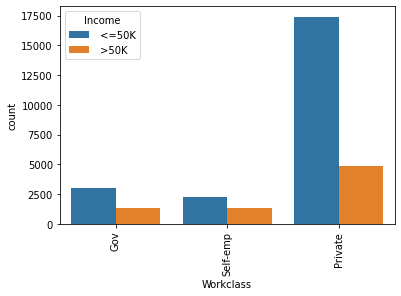

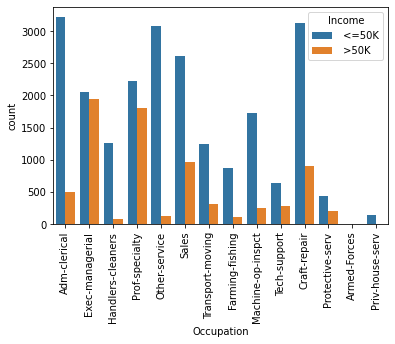

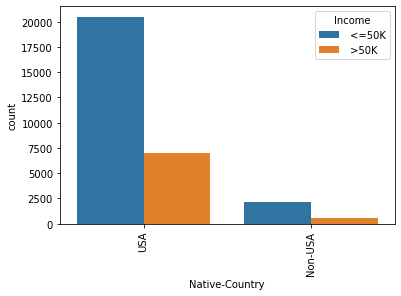

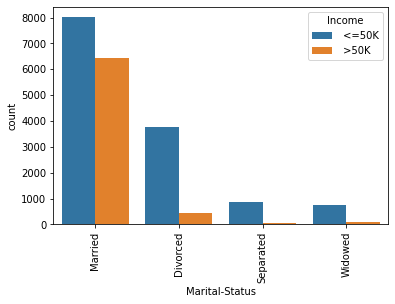

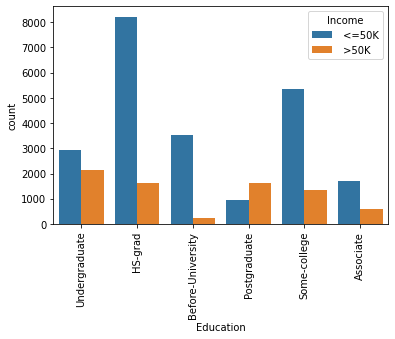

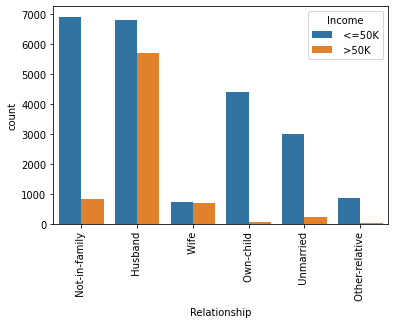

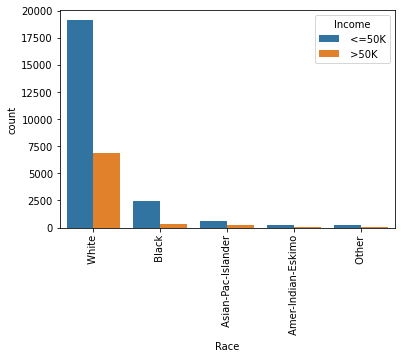

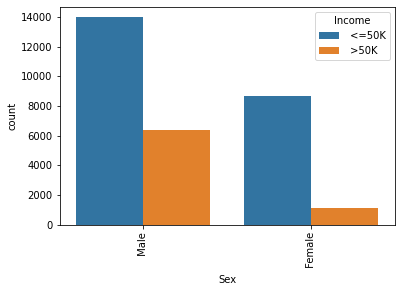

In [ ]:
# inspect pre-grouping for clarification
Categorical = ['Workclass', 'Occupation', 'Native-Country', 'Marital-Status', 'Education',
               'Relationship', 'Race', 'Sex']
for crown in Absent:
  chart = sns.countplot(x=crown, hue='Income', data=edagroup)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()


## Scan numeric data for outliers

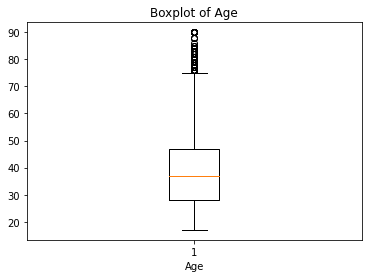

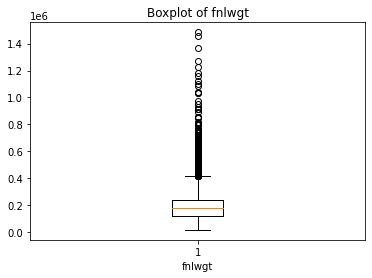

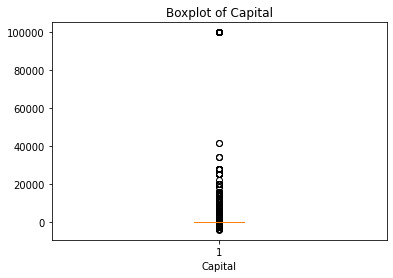

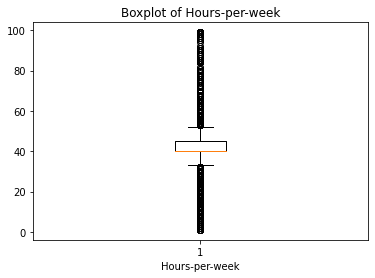

In [ ]:
# In our scans and diagrams, education number can be ignored as that is 
# congruent with 'Education' there is no numerical relationship or ordering
# for education number
Release = ['Age', 'fnlwgt', 'Capital' , 'Hours-per-week']

for crown in Release:
  plt.boxplot(edagroup[crown])
  plt.title('Boxplot of ' + crown)
  plt.xlabel(crown)
  plt.show()

The value 99999 is an outlier of capital, however this value can happen in reality for a person's income.


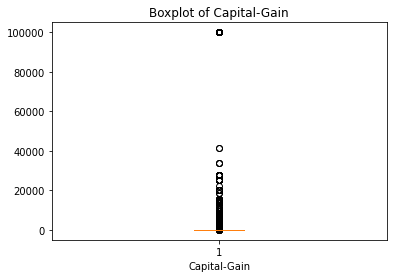

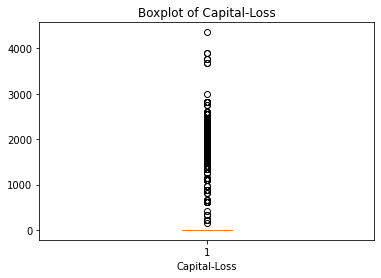

In [ ]:
Recrown = ['Capital-Gain', 'Capital-Loss']

for crown in Recrown:
  plt.boxplot(eda[crown])
  plt.title('Boxplot of ' + crown)
  plt.xlabel(crown)
  plt.show()

Finally, we plot a histogram of Capital, the new numeric feature specific to the grouped data set. 

Accordingly, we will have:

* Histograms of all numeric features including Capital.

* Boxplots of all numeric features including Capital.

* Barcharts of all categorical features before and after grouping.

* Barcharts of categorical features not involved in grouping

Barcharts of the categorical features not being recategorized (or grouped) are not very necessary.
Consider implementing them to observe the range of value counts of each category?




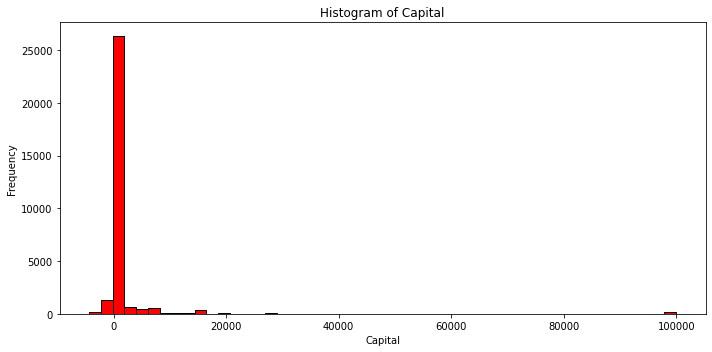

In [ ]:
# Histogram of Capital
edagroup['Capital'].plot(kind='hist', bins=50, figsize=(10,5),
                         facecolor='red', edgecolor='black')

plt.title("Histogram of Capital")
plt.xlabel("Capital")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


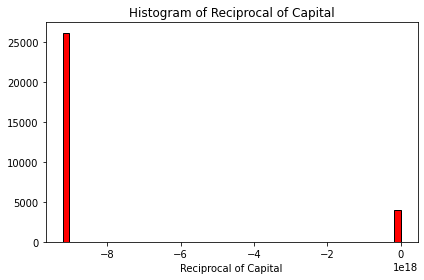

In [ ]:
# Capital Reciprocal histogram

# Compute the reciprocal of the Capital values
capital_reciprocal = np.reciprocal(edagroup['Capital'])

# Plot a histogram of the reciprocal of Capital
plt.hist(capital_reciprocal, bins=50, facecolor='red', edgecolor='black')
plt.title("Histogram of Reciprocal of Capital")
plt.xlabel("Reciprocal of Capital")
plt.tight_layout()
plt.show()